In [2]:
!pip install tensorflow tensorflow-hub opencv-python
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Make sure you extracted 'cats_and_dogs_filtered' to a known location
base_dir = r"C:\Users\hp\Downloads\cats_and_dogs_filtered\cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

img_size = (160, 160)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Class names:", class_names)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Class names: ['cats', 'dogs']


In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


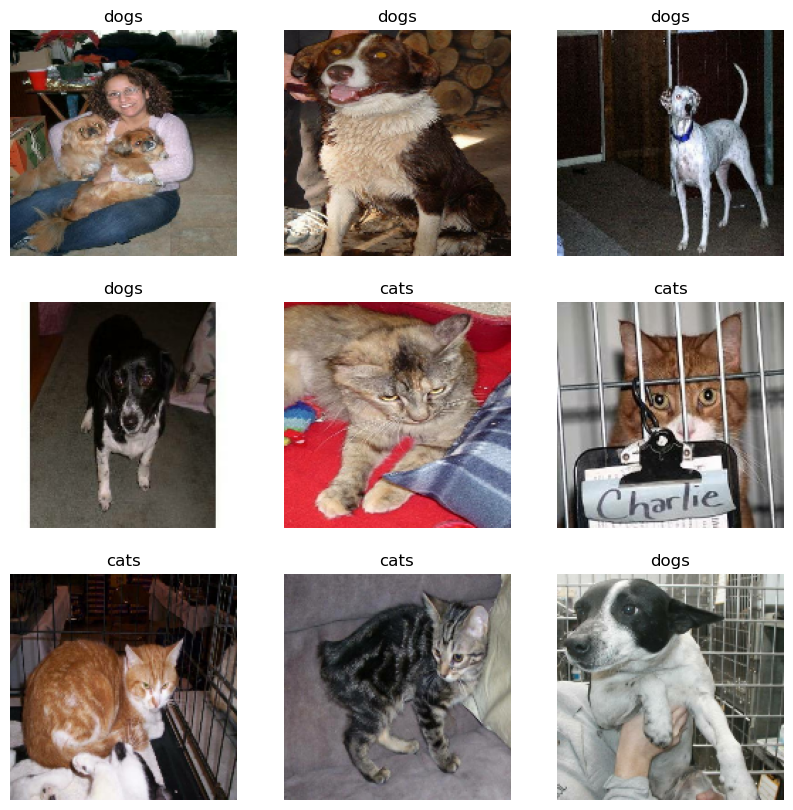

In [33]:
# Display some sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(160, 160, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


E:\semester 4\anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 158, 158, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 79, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 77, 77, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,401,921 (20.61 MB)

 Trainable params: 5,401,921 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
epochs = 5
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 310ms/step - accuracy: 0.5060 - loss: 0.7689 - val_accuracy: 0.5000 - val_loss: 0.6861
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 285ms/step - accuracy: 0.5672 - loss: 0.6793 - val_accuracy: 0.5860 - val_loss: 0.6462
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - accuracy: 0.6449 - loss: 0.6131 - val_accuracy: 0.6970 - val_loss: 0.5854
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.7666 - loss: 0.5097 - val_accuracy: 0.6730 - val_loss: 0.6109
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.7623 - loss: 0.4846 - val_accuracy: 0.7230 - val_loss: 0.5803


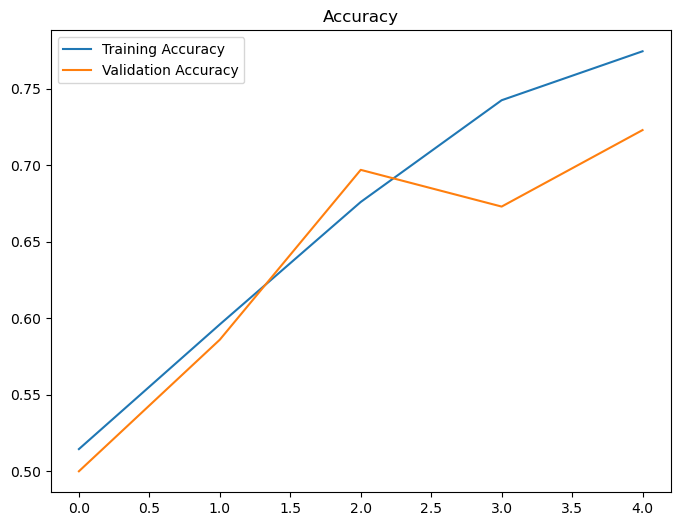

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 6))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [17]:
def detect_objects(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, dtype=tf.uint8)
    img_tensor = tf.expand_dims(img, 0)

    result = detector(img_tensor)
    result = {key: value.numpy() for key, value in result.items()}

    image_np = img.numpy()
    height, width, _ = image_np.shape

    plt.figure(figsize=(6, 6))
    plt.imshow(image_np)
    ax = plt.gca()

    for i in range(len(result["detection_scores"])):
        score = result["detection_scores"][i].item()  # ✅ Convert to float
        if score > 0.5:
            box = result["detection_boxes"][i]
            y1, x1, y2, x2 = box
            rect = plt.Rectangle((x1 * width, y1 * height),
                                 (x2 - x1) * width,
                                 (y2 - y1) * height,
                                 edgecolor='red', fill=False, linewidth=2)
            ax.add_patch(rect)
            ax.text(x1 * width, y1 * height, f'{score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()


Using image: C:/Users/hp/Downloads/cats_and_dogs_filtered/cats_and_dogs_filtered/validation\cats\cat.2000.jpg
Error during object detection: can only convert an array of size 1 to a Python scalar


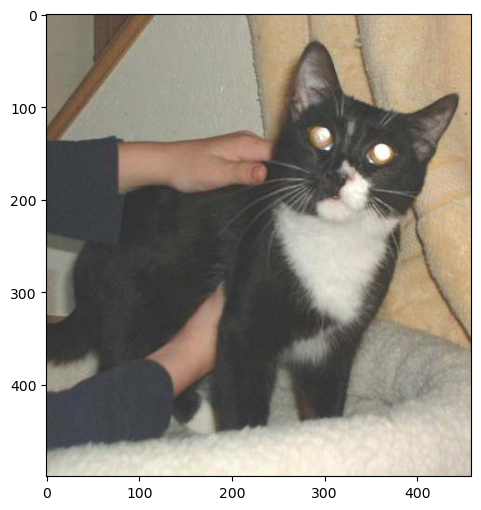

In [31]:
# Choose a subfolder (e.g., 'cats' or 'dogs')
category = 'cats'
image_dir = os.path.join(validation_dir, category)

# List only .jpg or .jpeg files
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg'))]

# Pick the first image file
image_path = os.path.join(image_dir, image_files[0])
print("Using image:", image_path)

# Run detection
detect_objects(image_path)


Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.
Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 438ms/step - accuracy: 0.5999 - loss: 0.6724 - val_accuracy: 0.6900 - val_loss: 0.5796
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 315ms/step - accuracy: 0.7449 - loss: 0.5292 - val_accuracy: 0.7150 - val_loss: 0.5390
Epoch 3/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 326ms/step - accuracy: 0.7653 - loss: 0.4927 - val_accuracy: 0.7425 - val_loss: 0.5144


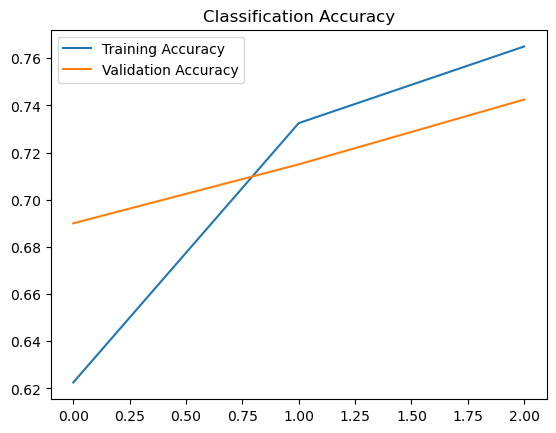

In [1]:

# === OBJECT CLASSIFICATION ===
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# Set dataset path
base_dir = r"C:/Users/hp/Downloads/cats_and_dogs_filtered/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Image preprocessing
IMG_SIZE = (160, 160)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Load pre-trained base model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=3)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Classification Accuracy")
plt.show()


In [8]:
import os
import cv2
import tensorflow as tf
import tensorflow_hub as hub

# Load detector model
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

# Define label map (extend if needed)
labels = {1: 'person', 17: 'cat', 18: 'dog'}

# Set paths
validation_dir = r"C:\Users\hp\Downloads\cats_and_dogs_filtered\cats_and_dogs_filtered\validation"
category = 'cats'  # or 'dogs'
image_dir = os.path.join(validation_dir, category)
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg'))]

# Create output dir
output_dir = "detections_output"
os.makedirs(output_dir, exist_ok=True)

def detect_and_save(image_path):
    img = tf.image.decode_jpeg(tf.io.read_file(image_path), channels=3)
    img = tf.image.convert_image_dtype(img, dtype=tf.uint8)
    height, width = img.shape[0], img.shape[1]
    img_tensor = tf.expand_dims(img, 0)

    result = detector(img_tensor)
    result = {k: v.numpy() for k, v in result.items()}

    img_np = (img.numpy() * 255).astype("uint8")
    img_cv = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

    for i in range(len(result["detection_scores"][0])):
        score = result["detection_scores"][0][i]
        if score > 0.5:
            box = result["detection_boxes"][0][i]
            class_id = int(result["detection_classes"][0][i])
            class_name = labels.get(class_id, "N/A")
            y1, x1, y2, x2 = box
            start = (int(x1 * width), int(y1 * height))
            end = (int(x2 * width), int(y2 * height))
            cv2.rectangle(img_cv, start, end, (0, 0, 255), 2)
            cv2.putText(img_cv, f"{class_name} {score:.2f}", start, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)

    filename = os.path.basename(image_path)
    save_path = os.path.join(output_dir, filename)
    cv2.imwrite(save_path, img_cv)
    print(f"Saved: {save_path}")

# Run detection on all images
for img_file in image_files:
    image_path = os.path.join(image_dir, img_file)
    detect_and_save(image_path)

Saved: detections_output\cat.2000.jpg
Saved: detections_output\cat.2001.jpg
Saved: detections_output\cat.2002.jpg
Saved: detections_output\cat.2003.jpg
Saved: detections_output\cat.2004.jpg
Saved: detections_output\cat.2005.jpg
Saved: detections_output\cat.2006.jpg
Saved: detections_output\cat.2007.jpg
Saved: detections_output\cat.2008.jpg
Saved: detections_output\cat.2009.jpg
Saved: detections_output\cat.2010.jpg
Saved: detections_output\cat.2011.jpg
Saved: detections_output\cat.2012.jpg
Saved: detections_output\cat.2013.jpg
Saved: detections_output\cat.2014.jpg
Saved: detections_output\cat.2015.jpg
Saved: detections_output\cat.2016.jpg
Saved: detections_output\cat.2017.jpg
Saved: detections_output\cat.2018.jpg
Saved: detections_output\cat.2019.jpg
Saved: detections_output\cat.2020.jpg
Saved: detections_output\cat.2021.jpg
Saved: detections_output\cat.2022.jpg
Saved: detections_output\cat.2023.jpg
Saved: detections_output\cat.2024.jpg
Saved: detections_output\cat.2025.jpg
Saved: detec